In [1]:
import numpy as np
import skfuzzy
from skfuzzy import control as ctrl

In [2]:
%matplotlib inline

In [3]:
# Antecedent = suhu 

suhu = ctrl.Antecedent(np.arange(0, 40.01, 0.05), "Suhu")

# Consequent = Kecepatan kipas
kipas = ctrl.Consequent(np.arange(0, 100.01, 0.05), "Kipas")

In [4]:
# Membership suhu dengan kurava segitiga
suhu["dingin"]=skfuzzy.trapmf(suhu.universe,[0, 0, 15, 20])
suhu["sejuk"]=skfuzzy.trimf(suhu.universe,[15, 20, 25])
suhu["normal"]=skfuzzy.trimf(suhu.universe,[20, 25, 30])
suhu["hangat"]=skfuzzy.trimf(suhu.universe,[25, 30, 35])
suhu["panas"]=skfuzzy.trapmf(suhu.universe,[30, 35, 40, 40])

In [17]:
# Membership kecepatan kipas dengan kurva trapesium
kipas["lambat"] = skfuzzy.trapmf(kipas.universe,[0, 0, 40, 50])
kipas["sedang"] = skfuzzy.trapmf(kipas.universe,[40, 50, 70, 80])
kipas["cepat"] = skfuzzy.trapmf(kipas.universe,[70, 80, 100, 100])

C:\Users\habkh\AppData\Roaming\Python\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


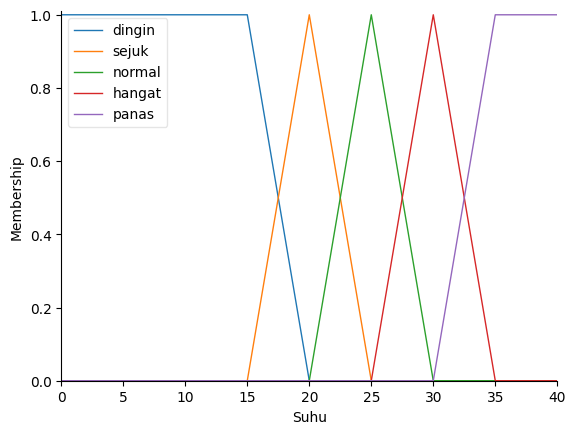

In [6]:
suhu.view()

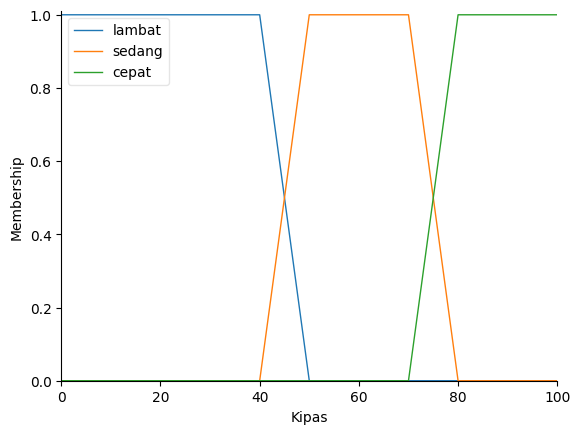

In [7]:
kipas.view()

In [8]:
# Karena rulenya hanya ada satu yakni "Jika suhu Hangat, maka kecepatan kipas adalah Sedang" maka didapat rumus seperti ini

R1 = ctrl.Rule(suhu["hangat"], kipas["sedang"])

In [9]:
print(R1)

IF Suhu[hangat] THEN Kipas[sedang]
	AND aggregation function : fmin
	OR aggregation function  : fmax


In [10]:
hasilMamdani = ctrl.ControlSystem([R1])

In [11]:
computeKipas = ctrl.ControlSystemSimulation(hasilMamdani)

In [12]:
# Test dengan suhu 28 derajat
computeKipas.input["Suhu"]= 28
computeKipas.compute()
print(computeKipas.output)

OrderedDict([('Kipas', 60.00000000000037)])


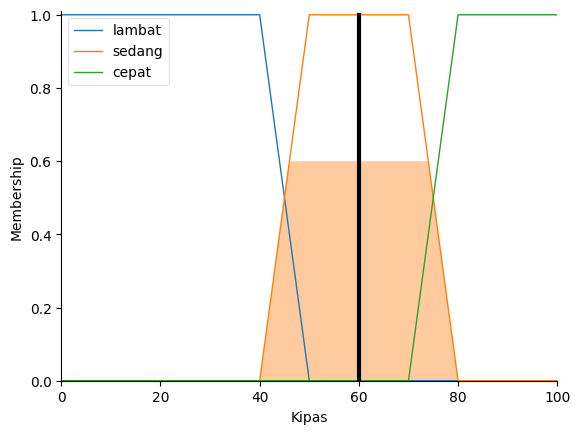

In [13]:
kipas.view(sim= computeKipas)

# untuk sif sugeno

In [19]:
def segitiga(x, a, b, c):
    if(x <= a or x >= c):
        return 0
    elif(a < x and x < b):
        return (x - a) / (b - a)
    elif(b < x and x < c):
        return (c - x) / (c-b)
    else:
        return 1

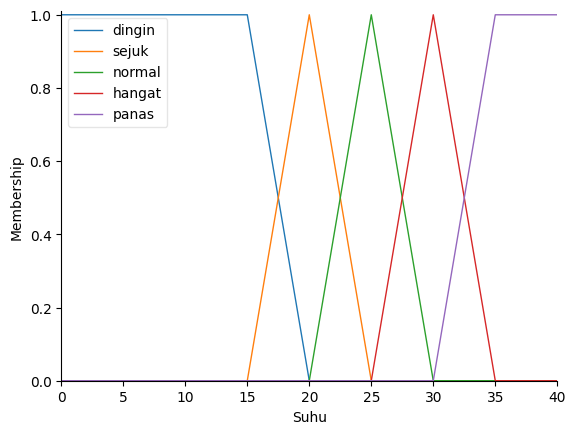

In [20]:
suhu.view()

In [23]:
sugenoHangat = segitiga(28, 25, 30, 35)

In [24]:
sugenoHangat

0.6

In [25]:
sugenoNormal = segitiga(28, 20, 25, 30)

In [26]:
sugenoNormal

0.4

In [29]:
defuzzifikasiSugenoHangat = 0.5 * 28

In [30]:
defuzzifikasiSugenoHangat

14.0

In [31]:
defuzzifikasiSugenoHangat = 0.5 * 0.6

In [32]:
defuzzifikasiSugenoHangat

0.3

In [27]:
defuzzifikasiSugeno = sugenoHangat * (80 - 40) + 40

In [28]:
defuzzifikasiSugeno

64.0